**Part 1**

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import json
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [139]:
login_times = pd.read_json('logins.json')

In [143]:
logins_path = 'logins.json'
with open(logins_path) as f:
    raw_logins = json.load(f)

In [145]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [147]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [149]:
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("15min").sum()

In [155]:
login_counts_15min = df_logins.resample('15min').size().to_frame(name='login_count')

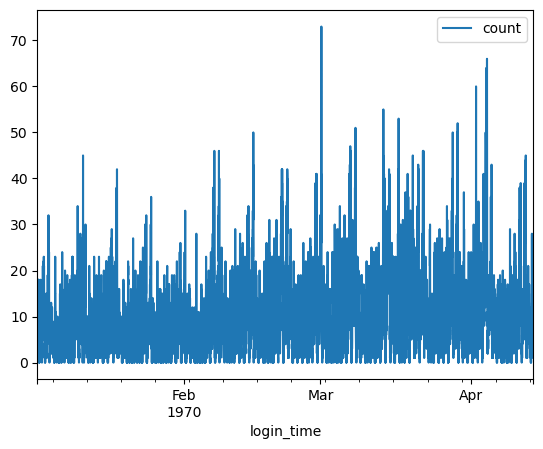

In [157]:
login_times_agg.plot()
plt.plot(login_counts_15min.index, login_counts_15min['login_count'], linewidth=1)

In [158]:
# Hourly pattern
login_times['hour'] = login_times.index.hour
login_times['weekday'] = login_times.index.dayofweek
login_times['day'] = login_times.index.day
login_times['month'] = login_times.index.month

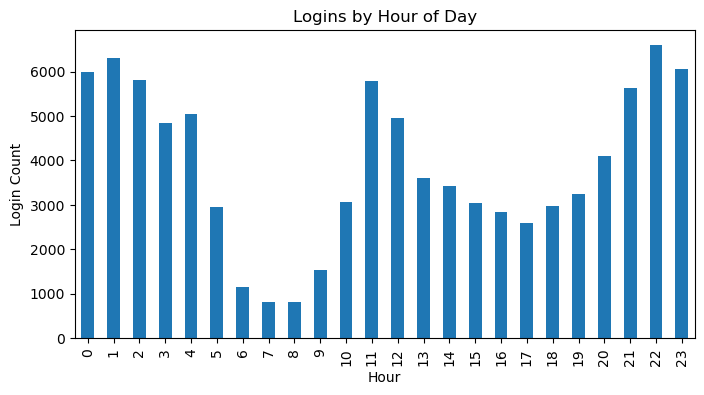

In [159]:
# Hourly
hourly = login_times.groupby('hour').size()
plt.figure(figsize=(8, 4))
hourly.plot(kind='bar')
plt.title('Logins by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Login Count')
plt.show()

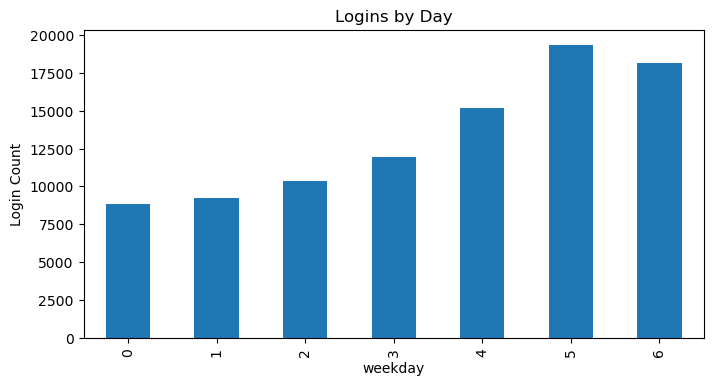

In [160]:
# Weekly
hourly = login_times.groupby('weekday').size()
plt.figure(figsize=(8, 4))
hourly.plot(kind='bar')
plt.title('Logins by Day')
plt.xlabel('weekday')
plt.ylabel('Login Count')
plt.show()

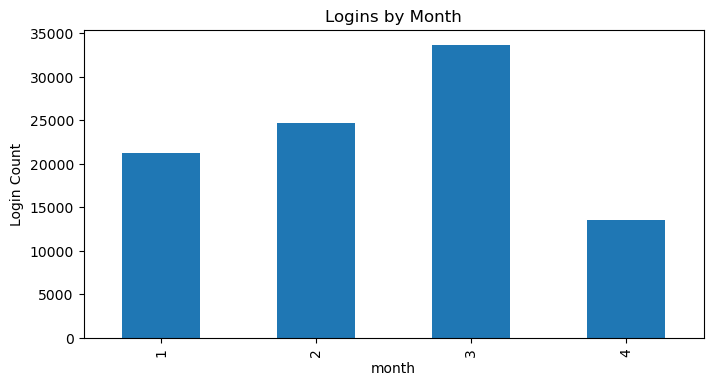

In [161]:
# monthly
hourly = login_times.groupby('month').size()
plt.figure(figsize=(8, 4))
hourly.plot(kind='bar')
plt.title('Logins by Month')
plt.xlabel('month')
plt.ylabel('Login Count')
plt.show()

**Part 2**
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Increase in cross-city driver activity, measured as the number or percentage of driver partners who complete trips in both Gotham and Metropolis during the experiment period.Why? Because It is easy to track using trip data

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) How you will implement the experiment
- A randomized controlled trial (RCT) using matched-pair or stratified randomization to assign a treatment group (toll reimbursed) and a control group (no reimbursement).
-  Run for 4–6 weeks, capturing both weekdays and weekends.
-  Measure number of drivers who complete trips in both cities, number of cross-city trips, total earnings, bridge usage, and time-of-day patterns

b) What statistical test(s) you will conduct to verify the significance of the
observation
- Chi-square test to compare the proportion of cross-city drivers in treatment vs control groups.
- Two-sample t-test or Mann-Whitney U test to compare the average number of cross-city trips per driver or average earnings between groups.

c)how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
- If a significantly higher proportion of drivers in the treatment group begin working in both cities (p < 0.05), conclude that toll reimbursement positively impacts cross-city activity.

**Part 3**

In [188]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

JSONDecodeError: Expecting ',' delimiter: line 1 column 26 (char 25)

**Since the JSON file attribute do not process. Here is the code for the modeling if it did load properly**

In [ ]:
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

In [ ]:
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()
#set target and drop unuseful columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

In [ ]:
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [ ]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth= 7, max_features=10, min_samples_leaf=4)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))

f1_rf=f1_score(y_test, y_pred,average='weighted')
print("f1 score:",f1_rf)

Ultimate can use the insights from the Random Forest model to identify key factors that influence rider retention—such as the number of trips in the first 30 days, surge pricing exposure, weekday usage, and Ultimate Black membership status. By targeting users who show early signs of churn (e.g., low trip counts, no weekday activity), Ultimate can implement retention strategies like personalized promotions, loyalty rewards, or onboarding support. Additionally, encouraging early high engagement and promoting features like Ultimate Black could significantly improve long-term rider retention.